In [2]:
# Montando o Google Drive para acessar arquivos armazenados lá
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
# Importando as bibliotecas essenciais para análise de dados e visualização
import pandas as pd  # Para manipulação de dataframes
import numpy as np  # Para operações numéricas
import matplotlib.pyplot as plt  # Para geração de gráficos
import seaborn as sns  # Para visualizações estatísticas mais avançadas

In [101]:
# Lendo o arquivo CSV 'abalone.csv' do Google Drive e armazenando em um DataFrame
df = pd.read_csv("/content/drive/MyDrive/Ciência de Dados/Curso - Introdução a Machine Learning/Módulo 2 - Métodos de Aprendizado de Máquina e suas Aplicações/SVM/Cancer_Breast.csv")

In [102]:
# Exibindo o DataFrame carregado para visualizar as primeiras linhas e colunas
display(df)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [103]:
# Exibindo informações sobre o DataFrame, como tipos de dados e valores não nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [104]:
# Exibindo estatísticas descritivas do DataFrame (média, desvio padrão, etc.)
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


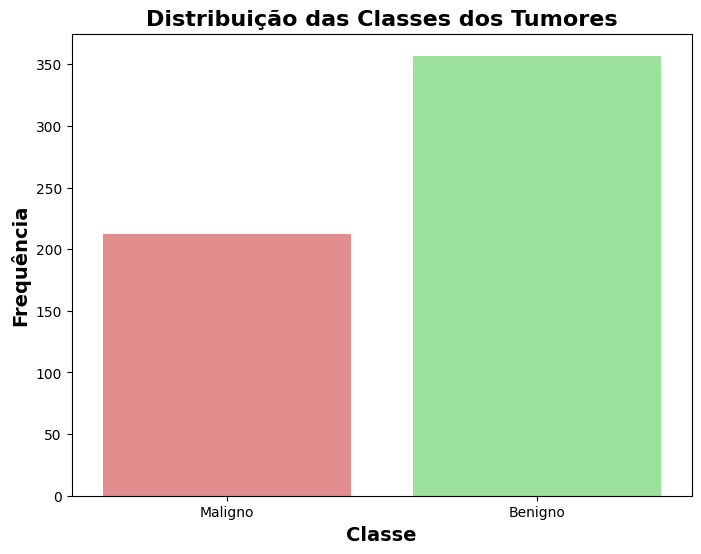

In [105]:
# Criando um gráfico de barras para visualizar a distribuição das classes de diagnóstico.
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df, hue='diagnosis', palette={'M': 'lightcoral' , 'B': 'lightgreen' }, dodge=False)
plt.title('Distribuição das Classes dos Tumores', fontsize=16, fontweight='bold')
plt.xlabel('Classe', fontsize=14, fontweight='bold')
plt.ylabel('Frequência', fontsize=14, fontweight='bold')
plt.xticks(ticks=[0, 1], labels=['Maligno', 'Benigno'])  # Adiciona rótulos mais descritivos
plt.show()

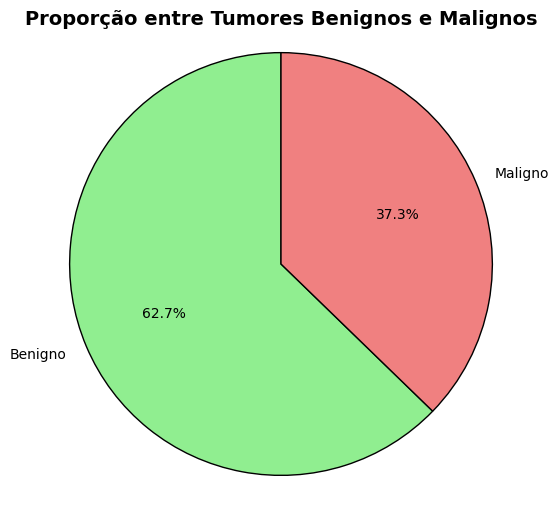

In [106]:
# Contagem das classes 'B' (benigno) e 'M' (maligno)
counts = df['diagnosis'].value_counts()

# Nomes para as fatias
labels = ['Benigno', 'Maligno']

# Cores das fatias
colors = ['lightgreen', 'lightcoral']

# Criando o gráfico de pizza
# Criando um gráfico de pizza que mostra a proporção entre tumores benignos e malignos.
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Proporção entre Tumores Benignos e Malignos', fontsize=14, fontweight='bold')
plt.axis('equal')  # Assegura que o gráfico seja um círculo
plt.show()

In [107]:
# Exibindo os nomes das colunas do DataFrame
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [108]:
# Separando os dados em features (X) e target (y).
X = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
y = df['diagnosis']

In [110]:
# Importa a função para calcular o ganho de informação mútua para problemas de classificação.
from sklearn.feature_selection import mutual_info_classif

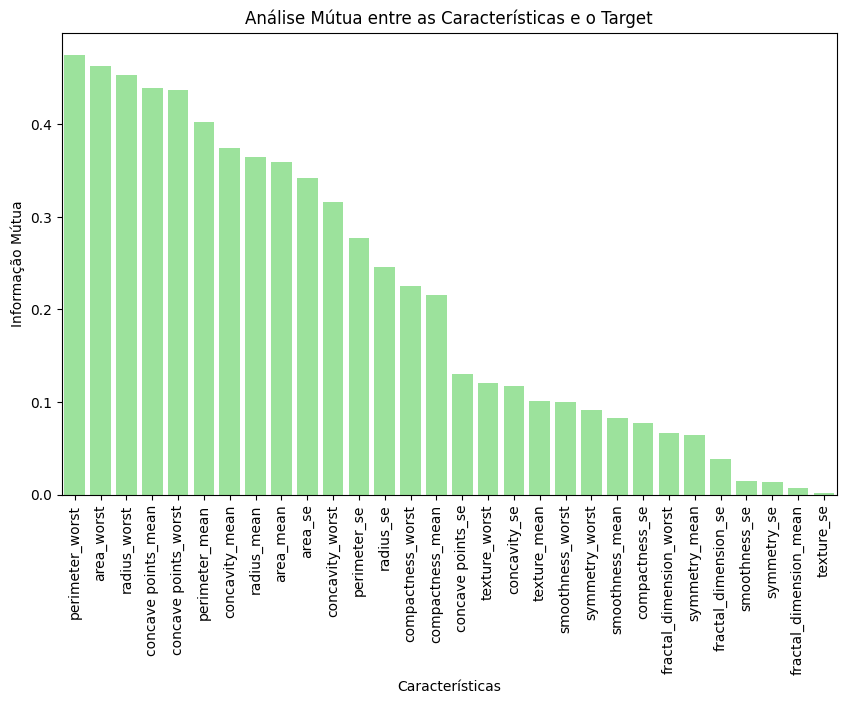

                         Mutual Information
perimeter_worst                    0.475130
area_worst                         0.463288
radius_worst                       0.452775
concave points_mean                0.439200
concave points_worst               0.437236
perimeter_mean                     0.402475
concavity_mean                     0.374312
radius_mean                        0.365058
area_mean                          0.358873
area_se                            0.341444
concavity_worst                    0.316475
perimeter_se                       0.277141
radius_se                          0.245998
compactness_worst                  0.224858
compactness_mean                   0.215207
concave points_se                  0.130507
texture_worst                      0.120510
concavity_se                       0.117415
texture_mean                       0.101005
smoothness_worst                   0.100395
symmetry_worst                     0.091749
smoothness_mean                 

In [111]:
# Calcular a análise mútua entre as variáveis independentes (X) e o target (y)
mutual_info = mutual_info_classif(X, y)  # mutual_info_classif calcula a dependência mútua

# Organizar os resultados em um DataFrame para fácil leitura
mutual_info_df = pd.DataFrame(mutual_info, index=X.columns, columns=["Mutual Information"])

# Ordenar os resultados para destacar as variáveis com maior informação mútua
mutual_info_df = mutual_info_df.sort_values(by="Mutual Information", ascending=False)

# Plotando os resultados da análise mútua
plt.figure(figsize=(10,6))  # Definir o tamanho da figura
sns.barplot(x=mutual_info_df.index, y=mutual_info_df['Mutual Information'], color = "lightgreen")  # Criar o gráfico de barras
plt.xticks(rotation=90)  # Rotacionar os rótulos no eixo x para melhor visualização
plt.title('Análise Mútua entre as Características e o Target')  # Título do gráfico
plt.xlabel('Características')  # Rótulo do eixo X
plt.ylabel('Informação Mútua')  # Rótulo do eixo Y
plt.show()  # Exibir o gráfico

# Mostrar a tabela com as informações mútuas, ordenadas por valor
print(mutual_info_df)

In [112]:
# Importando o LabelEncoder da biblioteca sklearn
from sklearn.preprocessing import LabelEncoder
# Inicializando o LabelEncoder
le = LabelEncoder()
# Transformando os rótulos da variável target 'y' em valores numéricos
y = le.fit_transform(y)

In [113]:
# Importando o StandardScaler da biblioteca sklearn
from sklearn.preprocessing import StandardScaler
# Inicializando o StandardScaler
scaler = StandardScaler()
# Padronizando os dados das features 'X'
X = scaler.fit_transform(X)

In [114]:
# Criando o dicionário de mapeamento
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
# Imprimindo o mapeamento
print(mapping)

{'B': 0, 'M': 1}


In [115]:
# Importando a função train_test_split para dividir os dados
from sklearn.model_selection import train_test_split, cross_val_score
# Dividindo os dados em conjuntos de treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [116]:
# Convertendo X_train para um DataFrame do pandas
X_train = pd.DataFrame(X_train)

In [117]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.109996,-0.321053,-0.158542,-0.198772,-1.204139,-0.769070,-0.753164,-0.919018,-1.236277,-0.991984,...,-0.192419,-0.523905,-0.299980,-0.271919,-1.545592,-0.457162,-0.555498,-0.828574,-0.891002,-0.765061
1,-0.215082,-0.674768,-0.241747,-0.288361,-1.794101,-0.589220,-0.098925,-0.539588,-1.422476,-0.647506,...,-0.416068,-0.476680,-0.454866,-0.436812,-1.309316,-0.007411,0.281190,-0.378019,-1.379572,-0.424808
2,0.159817,-1.235591,0.257479,0.003444,0.479635,1.502076,0.705598,0.363201,1.001751,1.596561,...,0.039513,-1.194821,0.203699,-0.125485,-0.051226,0.694887,0.238492,-0.057956,-0.119321,0.450762
3,-0.345728,-0.688730,-0.388796,-0.393877,-1.206274,-0.960480,-0.628619,-0.648697,0.063458,-0.868652,...,-0.494759,-0.598813,-0.490013,-0.492186,-0.993698,-0.659455,-0.459548,-0.491153,0.199382,-0.801081
4,-0.144078,0.916946,-0.196849,-0.232332,-0.277565,-0.698760,-0.741488,-0.631673,-0.538947,-0.678694,...,-0.190348,0.555750,-0.288363,-0.265064,-0.472051,-0.652457,-0.802570,-0.652707,-0.418610,-0.798864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,-1.488033,-1.082004,-1.366651,-1.168611,0.104593,0.924055,-0.034392,-0.521016,0.329977,3.827870,...,-1.353531,-1.629614,-1.331463,-1.048038,-0.511503,-0.067845,-0.617866,-1.016318,-1.046309,1.355149
394,-0.706426,-0.223317,-0.691956,-0.689379,1.269571,-0.050051,-0.227236,-0.362899,-0.038768,0.340564,...,-0.648001,0.583433,-0.647878,-0.630885,1.597003,0.074651,0.072498,0.109537,-0.153294,0.389251
395,0.046211,-0.574704,-0.068748,-0.063392,-2.282296,-1.470464,-1.023849,-1.100607,-1.108494,-1.281175,...,-0.281464,-0.818652,-0.381891,-0.344521,-2.047074,-1.297121,-1.120358,-1.237560,-0.716282,-1.260478
396,-0.041833,0.076875,-0.034972,-0.157532,0.686015,0.169787,0.298817,0.405245,-0.520693,0.374586,...,0.159621,0.834212,0.197742,-0.019835,1.268234,0.652266,0.646282,1.036837,0.450138,1.194443


In [118]:
y_train

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,

In [120]:
# Importando a classe SVC e as métricas de avaliação
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, recall_score, precision_score

In [121]:
# Definindo o modelo SVM com kernel linear e C=0.1
model = SVC(kernel='linear', C=0.1)

In [122]:
# Treinando o modelo com os dados de treino
model.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

In [123]:
# Fazendo as previsões com os dados de teste
y_pred = model.predict(X_test)

In [124]:
# Calculando a acurácia do modelo
acuracia = accuracy_score(y_test, y_pred) *100
# Imprimindo a acurácia
print(f"Acurácia: {acuracia:.2f}%")

Acurácia: 98.25%


In [125]:
# Calculando a validação cruzada com 10 folds
valid_cross = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy') * 100
# Imprimindo a média da validação cruzada
print(f"Validação cruzada: {valid_cross.mean():.2f}%")

Validação cruzada: 97.23%


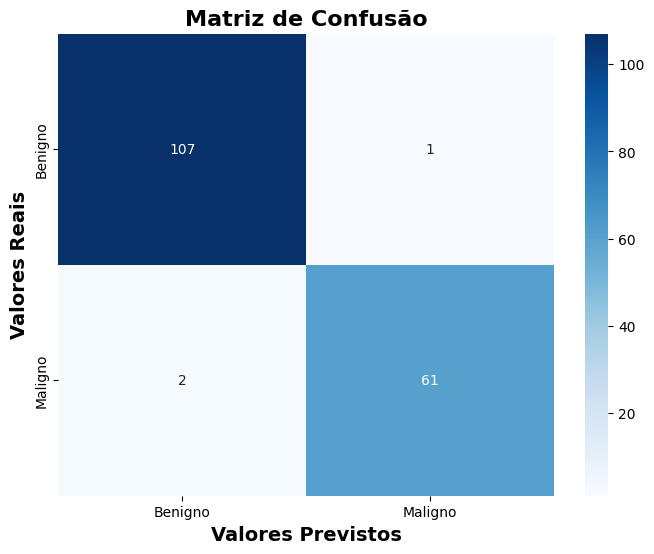

In [126]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Criando um DataFrame para a matriz de confusão
cm_df = pd.DataFrame(cm, index=['Benigno', 'Maligno'], columns=['Benigno', 'Maligno'])

# Plotando o mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão', fontsize=16, fontweight='bold')
plt.ylabel('Valores Reais', fontsize=14, fontweight='bold')
plt.xlabel('Valores Previstos', fontsize=14, fontweight='bold')
plt.show()

#Ajuste de Threshold baseado em recall e Hiperparâmetros

In [127]:
# Importando GridSearchCV para ajuste de hiperparâmetros
from sklearn.model_selection import GridSearchCV

In [128]:
# Definindo os parâmetros para o Grid Search.
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.01, 0.1, 1, 10, 100],  # Apenas relevante para rbf e poly
    'degree': [2, 3, 4]  # Apenas relevante para poly
}

In [60]:
# Inicializa o GridSearchCV com o modelo SVM, a grade de parâmetros e validação cruzada de 10 folds
grid = GridSearchCV(SVC(random_state=42), param_grid, cv=5)

# Ajusta o modelo com os dados de treino para encontrar os melhores parâmetros
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly']})

In [61]:
# Imprime os melhores parâmetros encontrados pelo GridSearchCV
print("Melhores parâmetros:", grid.best_params_)

Melhores parâmetros: {'C': 1, 'degree': 2, 'gamma': 0.01, 'kernel': 'linear'}


In [129]:
# Treinamento do modelo SVM com cálculo de probabilidades
model = SVC(kernel='linear', C=1, probability=True, random_state=42)
model.fit(X_train, y_train)

# Obter as probabilidades para a classe positiva
y_prob = model.predict_proba(X_test)[:, 1]

In [130]:
# Usar o threshold ajustado
custom_threshold = 0.30
y_pred_custom = (y_prob >= custom_threshold).astype(int)

recall = recall_score(y_test, y_pred_custom)
precision = precision_score(y_test, y_pred_custom)
accuracy = accuracy_score(y_test, y_pred_custom)

print(f'Recall: {recall:.5f}')
print(f'Precisão: {precision:.5f}')
print(f'Acurácia: {accuracy:.5f}')

Recall: 0.98413
Precisão: 0.93939
Acurácia: 0.97076


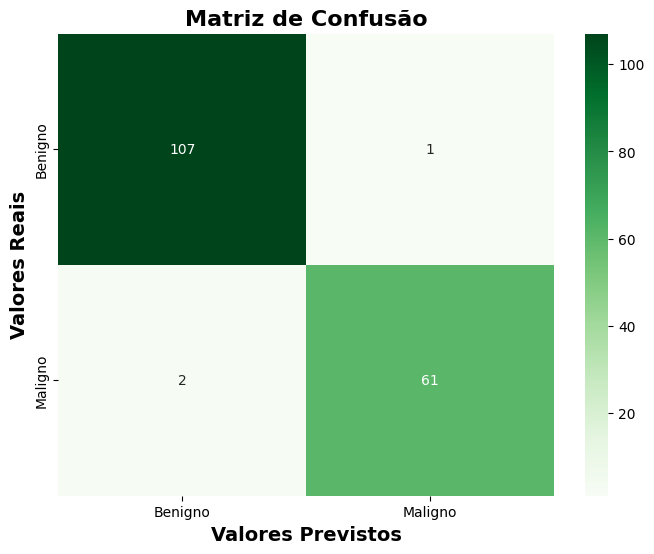

In [132]:
# Calculando a matriz de confusão
cm_2 = confusion_matrix(y_test, y_pred_custom)

# Criando um DataFrame para a matriz de confusão
cm2_df = pd.DataFrame(cm, index=['Benigno', 'Maligno'], columns=['Benigno', 'Maligno'])

# Plotando o mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm2_df, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusão', fontsize=16, fontweight='bold')
plt.ylabel('Valores Reais', fontsize=14, fontweight='bold')
plt.xlabel('Valores Previstos', fontsize=14, fontweight='bold')
plt.show()